# Interacting with the IBM Watson Natural Language Understanding API; POST vs GET

Another useful API, especially when dealing with text, is the [IBM Watson  Natural Language Understanding API](https://console.bluemix.net/catalog/services/natural-language-understanding), which offers a variety of text analysis functionalities, such as sentiment analysis, entity extraction, keyword extraction, etc.

We will give a couple of examples below, to understand how we can take an unstructured piece of text (either the text alone, or a URL with text), and extract some "semi-structured" representation of its content.



## /analyze call

We will first start with the `GET /analyze` API call ([documentation](https://www.ibm.com/watson/developercloud/natural-language-understanding/api/v1/#get-analyze)), which takes as input a piece of text, and returns an analysis across various dimensions.

The call below gets as input a "text" variable, and returns back the sentiment of the text.

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# My own API key. It may run out of quota
# You can register and get your own credentials
# The ones below have a quota of 1000 calls per day 
# and can run out quickly if multiple people use these
API_KEY = 'xEG9rMcaboPOooduqFvwm43D9cggANlFgmLR5-3m8cD7'

URL = 'https://api.eu-gb.natural-language-understanding.watson.cloud.ibm.com/instances/6248c51f-5b25-4312-b759-48617fb52f1b'

In [ ]:
def getSentiment(text):
    endpoint = f"{URL}/v1/analyze"
    username = "apikey"
    password = API_KEY
    
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        'text': text,
        'language' : 'en',
        # url = url_to_analyze, this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

In [ ]:
# We will analyze the text below using the IBM Watson API

text = '''
Based   on the analysis summarized in Attachment A, and the benefits historically delivered by ISS, IATA recommends continuing with the SSP, while working in close alignment with IFAC, other Advisory Councils and other relevant governance bodies, as well as engaging directly with the airline and broader air transportation value chain community to obtain direct input and feedback.

SSP, with its core goal of a fit for purpose, flexible revitalised industry settlement services portfolio, is one of the enablers to support any airline that wishes to embrace and adopt the rapid changes occurring in passenger and cargo distribution and payment.

It has also been identified that renewing and revitalizing the provision of IATA’s own settlement services provisions will also provide benefits to the industry in other areas. Some of these benefits are:

•	Realize more industry efficiencies through simplification of financial processes and integration requirements.
•	Provide a flexible settlement services platform capable of supporting multiple business domains and models. 
•	Adding value and choice by moving away from the “one size fits all model” hence enabling participating airlines to only subscribe to and consume services they wish to consume based on their individual needs and value they will receive. 
•	Allow for seamless deployment of financial services into new market segments and implementation of a richer portfolio of value-added services beyond the traditional scope of IATA’s passenger agency and cargo agency programs.
•	Serve a broader scope of the passenger and cargo community needs beyond the inherent limitations of the existing settlement system scope (airlines, accredited agents, freight forwarders).
•	Creating new capabilities as shared services will enable IATA to support Members with new settlement opportunities as they arise in the future. As example, support the ‘Industry Sustainability’ agenda by catering to processing and settlements needs of CO2 offset markets or linked to exchange of fast-growing Sustainable Aviation Fuel (SAF).    

'''

In [ ]:
data = getSentiment(text)
data

{'emotion': {'document': {'emotion': {'anger': 0.02514,
    'disgust': 0.020356,
    'fear': 0.102374,
    'joy': 0.511244,
    'sadness': 0.266273}}},
 'language': 'en',
 'sentiment': {'document': {'label': 'positive', 'score': 0.810465}},
 'usage': {'features': 2, 'text_characters': 2084, 'text_units': 1}}

In [ ]:
WordCloud().process_text(text)

{'Adding': 1,
 'Advisory': 1,
 'Allow': 1,
 'Attachment': 1,
 'Aviation': 1,
 'Based': 2,
 'CO2': 1,
 'Councils': 1,
 'Creating': 1,
 'Fuel': 1,
 'IATA': 4,
 'IFAC': 1,
 'ISS': 1,
 'Members': 1,
 'Realize': 1,
 'SAF': 1,
 'SSP': 2,
 'Serve': 1,
 'Sustainability': 1,
 'Sustainable': 1,
 'accredited': 1,
 'added': 1,
 'adopt': 1,
 'agency': 2,
 'agenda': 1,
 'agents': 1,
 'air': 1,
 'airline': 4,
 'alignment': 1,
 'analysis': 1,
 'areas': 1,
 'arise': 1,
 'away': 1,
 'benefits': 3,
 'beyond': 2,
 'bodies': 1,
 'broader': 2,
 'business': 1,
 'capabilities': 1,
 'capable': 1,
 'cargo': 3,
 'catering': 1,
 'chain': 1,
 'changes': 1,
 'choice': 1,
 'close': 1,
 'community': 2,
 'consume': 2,
 'continuing': 1,
 'core': 1,
 'delivered': 1,
 'deployment': 1,
 'direct': 1,
 'directly': 1,
 'distribution': 1,
 'domains': 1,
 'efficiencies': 1,
 'embrace': 1,
 'enable': 1,
 'enablers': 1,
 'enabling': 1,
 'engaging': 1,
 'example': 1,
 'exchange': 1,
 'existing': 1,
 'fast': 1,
 'feedback': 1,
 'f

In [ ]:
wordcloud = WordCloud(width= 3000, height = 2000, random_state=1, 
                      background_color='salmon', colormap='Pastel1', 
                      collocations=False, stopwords = STOPWORDS).generate(text)

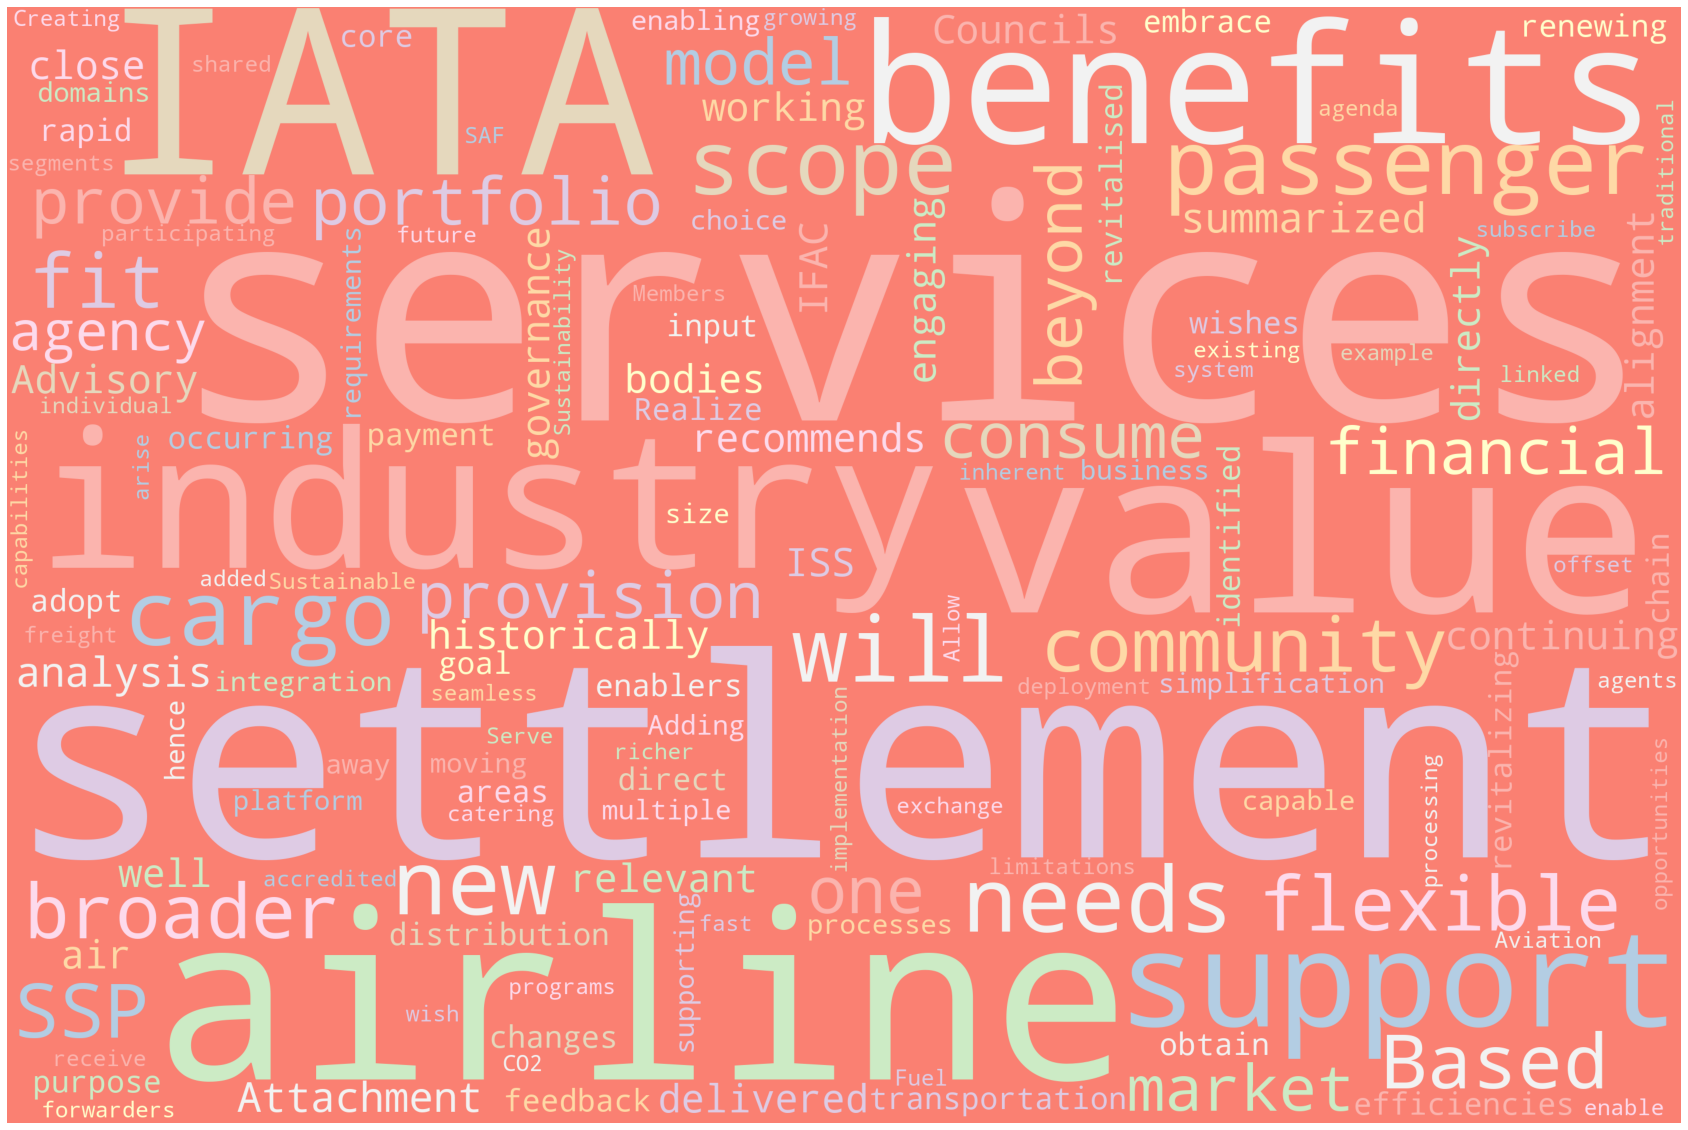

In [ ]:
def plot_cloud(wordcloud):
    # Set figure size
    plt.figure(figsize=(30, 30))
    plt.imshow(wordcloud)
    plt.axis("off")
plot_cloud(wordcloud)

Now, let's try to understand the structure of the answer. First, we check the high-level keys.

In [ ]:
data.keys()

dict_keys(['usage', 'sentiment', 'language', 'emotion'])

Now, let's check the content of these keys:

In [ ]:
data['language']

'en'

In [ ]:
data['sentiment']

{'document': {'label': 'positive', 'score': 0.568312}}

In [ ]:
data['emotion']

{'document': {'emotion': {'anger': 0.045194,
   'disgust': 0.01402,
   'fear': 0.048237,
   'joy': 0.314842,
   'sadness': 0.257947}}}

In [ ]:
# Let's go deeper into the 'emotion' dictionary
data['emotion']['document']

{'emotion': {'anger': 0.045194,
  'disgust': 0.01402,
  'fear': 0.048237,
  'joy': 0.314842,
  'sadness': 0.257947}}

In [ ]:
# And a bit more
data['emotion']['document']['emotion']

{'anger': 0.045194,
 'disgust': 0.01402,
 'fear': 0.048237,
 'joy': 0.314842,
 'sadness': 0.257947}

### Exercise 2

Below is a slightly modified function, which takes as input a URL to analyze, instead of a piece of text. Use it to analyze a URL of your choice

In [ ]:
def getSentiment_url(url_to_analyze):
    endpoint = f"{URL}/v1/analyze"
    username = "apikey"
    password = API_KEY
    
    parameters = {
        'features': 'emotion,sentiment',
        'version' : '2020-08-01',
        #'text': text,
        'language' : 'en',
        'url': url_to_analyze # this is an alternative to sending the text
    }

    resp = requests.get(endpoint, params=parameters, auth=(username, password))
    
    return resp.json()

In [ ]:
url = 'https://www.espn.com/nba/story/_/id/31649049/atlanta-hawks-erase-26-point-deficit-defeat-philadelphia-76ers-take-3-2-series-lead'
getSentiment_url(url)

## Entities call

[Full Documentation of the call](https://www.ibm.com/watson/developercloud/natural-language-understanding/api/v1/#entities)

This is a an API call that extracts entities from the text, and also the sentiment and emotion for each of these entities.

There are two new technical aspects with this API. First of all, we use the command `requests.post` as opposed to `requests.get`. This happens because `GET` is designed to handle limited amount of data. When we have a large volume of data to send as parameters, then the HTTP protocol requires the use of the `POST` command. You will also see that the parameters that we pass are not "flat" as they used to be. Instead we submit the `watson_options` as the set of parameters, which is itself semi-structured.

In terms of natural language processing, we will examine a couple of capabilities of the API. First, you will see that there is the capability of "normalizing" each entity, so that two different ways of saying the same thing get mapped to the same entity. So for example, "President Trump" and "Donald Trump" get mapped to the same Knowledge Graph entity.

In [ ]:
import requests
import json

def processURL(url_to_analyze):
    endpoint_watson = f"{URL}/v1/analyze"
    params = {
        'version': '2020-08-01',
    }
    headers = { 
        'Content-Type': 'application/json',
    }
    watson_options = {
      "url": url_to_analyze,
      "features": {
        "entities": {
          "sentiment": True,
          "emotion": True,
          "limit": 10
        }
      }
    }
    username = "apikey"
    password = API_KEY

    resp = requests.post(endpoint_watson, 
                         data=json.dumps(watson_options), 
                         headers=headers, 
                         params=params, 
                         auth=(username, password) 
                        )
    return resp.json()

In [ ]:
url_to_analyze = 'https://www.reuters.com/technology/us-defended-amazon-after-article-showed-company-bypassed-indian-law-2021-05-21/'

data = processURL(url_to_analyze)

In [ ]:
data

In [ ]:
# Let's see what we get back as top-level attributes
data.keys()

In [ ]:
# Let' see the entities list
data["entities"]

In [ ]:
# Let' see the third entity. Notice the "disambiguated" attribute that
# points to "canonical" versions of the entity, in DBPedia
# Notice that USTR is the actual term used in the text
data["entities"][1]

In [ ]:
# This function takes as input the result
# from the IBM Watson API and returns a list
# of entities that are relevant (above threshold)
# to the article
def getEntities(data, threshold):
    result = []
    for entity in data["entities"]:
        relevance = float(entity['relevance'])
        if relevance > threshold:
            result.append(entity['text'])
    return result

getEntities(data, 0.25)

### Exercise

* First of all, **get your own credentials for the IBM Watson API**. The demo key that we use above has a limited quota.
* Use an API to get news articles. 
    * Option 1: Use the API at https://newsapi.org to fetch the news from various sources. Print the entities that are currently being discussed in the news, together with their relevance value and the associated sentiment.
    * Option 2: Use the NY Times API to fetch the Top Stories News. You can register and get an API key at https://developer.nytimes.com/. The `Top Stories V2 API` provides the details of the news of the day: (The API call documentation is at https://developer.nytimes.com/docs/top-stories-product/1/overview and the API Call is  https://api.nytimes.com/svc/topstories/v2/home.json?api-key=PUTYOURKEYHERE). Repeat the entity extraction process from above.
    * Option 3: Use the Guardian API at https://open-platform.theguardian.com/documentation/ to fetch news from The Guardian.
